In [15]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import netCDF4 as nc
import matplotlib.colors as colors

In [ ]:
15.811562299728 , 19.866891679168

In [38]:
def read_and_save_nc(nc_file , out="nc_png.png"):
    nc_obj = nc.Dataset(nc_file)
    new_cmap = colors.ListedColormap(["#93006C","#6F0090","#4800B7","#2100DE","#000AFF","#004AFF","#0090FF","#00D5FF","#00FFD7","#00FF77","#00FF0F","#60FF00","#C8FF00","#FFEB00","#FFB700","#FF8300","#FF4F00","#FF1F00","#E60000","#A50000","#690000"])
    data = nc_obj.variables['sst4'][:]
    norm=colors.Normalize(vmin=nc_obj.data_minimum-1, vmax=nc_obj.data_maximum+1)
    image = new_cmap(norm(data))
    plt.imsave(out , image)
    return out

In [39]:
def load_model()->tf.keras.Model:
    model_path = "mask_model.h5"
    model = tf.keras.models.load_model(model_path)
    return model

In [40]:
def prepere_image(nc_path: str )->np.ndarray:
    image_path = read_and_save_nc(nc_path)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , (512, 512))
    image = np.expand_dims(image, 0) #(1, 512, 512, 3)
    return image 

In [41]:
def predict(nc_path:str)->np.ndarray:
    model = load_model()
    image = prepere_image(nc_path)
    mask = model(image)
    mask = mask.numpy().squeeze(0)
    return image , mask


In [42]:
def plot_mask(nc_path, image_output , figsize=(10,10)):
    fig, axes = plt.subplots(1,3, figsize=figsize)
    axes = axes.flatten()
    image , mask = predict(nc_path)
    axes[0].imshow(image.squeeze(0))
    axes[1].imshow(np.logical_not(mask.astype(bool)).astype(int), cmap="binary")
    axes[2].imshow(image.squeeze(0))
    axes[2].imshow(mask , alpha=0.5)
    for i in range(3):
        axes[i].axis("off")

    fig.savefig(image_output ,pad_inches=0, bbox_inches='tight')
    

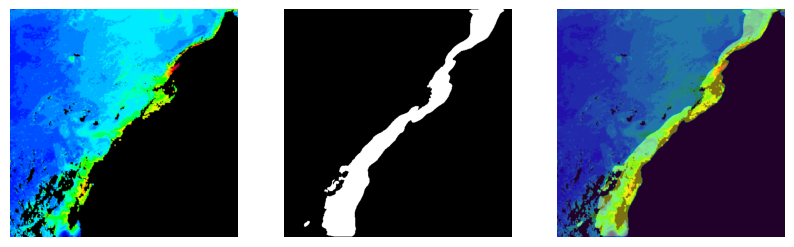

In [43]:
nc_file = r"F:\project-freelancer\data\AQUA_MODIS.20030712_20030719.L3m.8D.SST4.x_sst4.nc"
plot_mask(nc_file,"mask.png")